In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

nndf = pd.read_csv("../data/student_alcohol_data_for_mlp.csv")

numeric_columns = ['age', 'Medu', 'Fedu',  'absences', 'G1', 'G2', 'G3']

scaler = StandardScaler()
nndf[numeric_columns] = scaler.fit_transform(nndf[numeric_columns])


In [43]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                       'famsup', 'paid', 'activities', 'nursery', 'higher',
                       'internet', 'romantic', 'goout_degree', 'alc_level',
                       'freetime_degree', 'health_degree', 'famrel_degree','traveltime','studytime','failures']

nndf = pd.get_dummies(nndf, columns=categorical_columns, drop_first=True)


In [44]:
y = nndf["G3"]
X = nndf.drop("G3",axis =1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.4, random_state = 1)

X_val,X_test,y_val,y_test = train_test_split(
    X_test, y_test ,test_size = 0.5, random_state = 1
)


In [46]:
import tensorflow as tf
features = X_train.shape[1]
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (features,)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)])
    
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics = ['mae'] 
)

In [47]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[es]           
)
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)



Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.6239 - mae: 0.5593 - mse: 0.6239 - val_loss: 0.4223 - val_mae: 0.4884 - val_mse: 0.4223
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3685 - mae: 0.4489 - mse: 0.3685 - val_loss: 0.3040 - val_mae: 0.3777 - val_mse: 0.3040
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2997 - mae: 0.3938 - mse: 0.2997 - val_loss: 0.2854 - val_mae: 0.3614 - val_mse: 0.2854
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2728 - mae: 0.3723 - mse: 0.2728 - val_loss: 0.2748 - val_mae: 0.3612 - val_mse: 0.2748
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2633 - mae: 0.3583 - mse: 0.2633 - val_loss: 0.2723 - val_mae: 0.3635 - val_mse: 0.2723
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2263 - mae: 0.3366 - mse: 0.2263 - val_loss: 0.2462 - val_mae: 0.3305 - val_mse: 0.2462
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2087 - mae: 0.3343 - mse: 0.2087 - val_loss: 

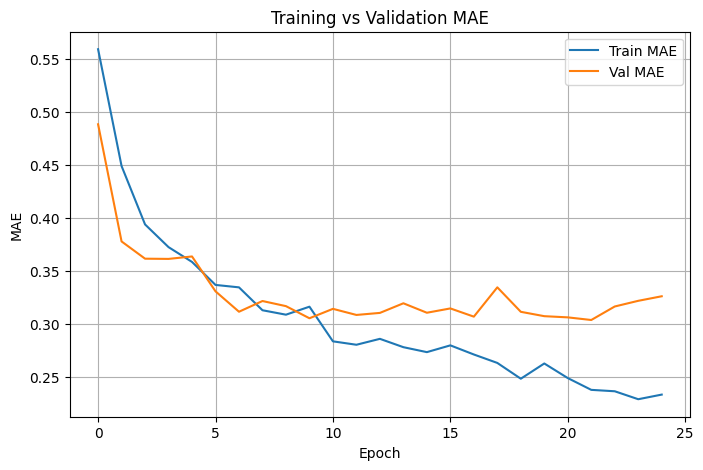

In [48]:
history.history
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()